In [6]:
! cls
! # pip install -r requirements.txt


'#' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
%%time
from IPython.display import clear_output
clear_output()

from AZernike import *

Wall time: 3.71 ms


In [8]:
# cpu, gpu info
print_cpu_info()
print()
print_gpu_info()

======================================== CPU Details ========================================
Processor type: Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
Operating system release: 10
Operating system version: 10.0.19043

Number of physical cores: 6
Number of logical cores: 12
Current CPU frequency: 2.21 GHz
Min CPU frequency: 0.0 GHz
Max CPU frequency: 2.208 GHz

======================================== Memory Details ========================================
Total RAM installed: 25.63 GB
Available RAM: 14.07 GB
Used RAM: 11.56 GB
RAM usage: 45.1%

======================================== GPU Details ========================================
  id  name                     load    free memory    used memory    total memory    temperature
----  -----------------------  ------  -------------  -------------  --------------  -------------
   0  NVIDIA GeForce GTX 1060  11.0%   4.726 GB       1.418 GB       6.144 GB        50.0 °C


In [9]:
import psutil, igpu

devices = [ 'CPU' ]

frequencies = [ psutil.cpu_freq().max/1_000 ] 
memories = [ round(psutil.virtual_memory().total/10**9/10, 2) ]

for gpu in igpu.devices() : 
    devices.append( f"GPU {gpu.index}" )
    frequencies.append( gpu.clocks.max_graphics/1_000 )
    memories.append( gpu.memory.total/1_000/10 )
pass

row_cnt = 1; col_cnt = 1
fig, charts = plt.subplots( row_cnt, col_cnt, figsize=( 8*col_cnt, 6*row_cnt) )
charts = charts.flatten() if row_cnt*col_cnt > 1 else [charts]
chart_idx = 0 
chart = charts[ chart_idx ]

w = 0.15
n = 2
x = numpy.arange(0, len(devices) ).astype( numpy.float64 )
x += w*((1.0-n)/2.0)

yticks = numpy.arange( 0, math.ceil( max( max(frequencies), max(memories)) ), 2 )

chart.bar( x + w*0, frequencies, width=w, label="Frq. (GHZ)" )
chart.bar( x + w*1, memories, width=w, label="Memory (10 Gbytes)" )

chart.set_xticks( x, devices )
chart.set_yticks( yticks )
chart.set_title( "\nDevice Specification\n" )
chart.set_xlabel( "\nDevice Name")

chart.legend()

plt.tight_layout()
plt.show()

AttributeError: 'NoneType' object has no attribute 'name'

Hello... Good morning!
Importing python packages was done.
time = 665953264500
Zernike functions are defined.
Current Time = 08:52:03
Plots of Radial Poolynomial
Current Time = 08:52:03
use_gpu = 0


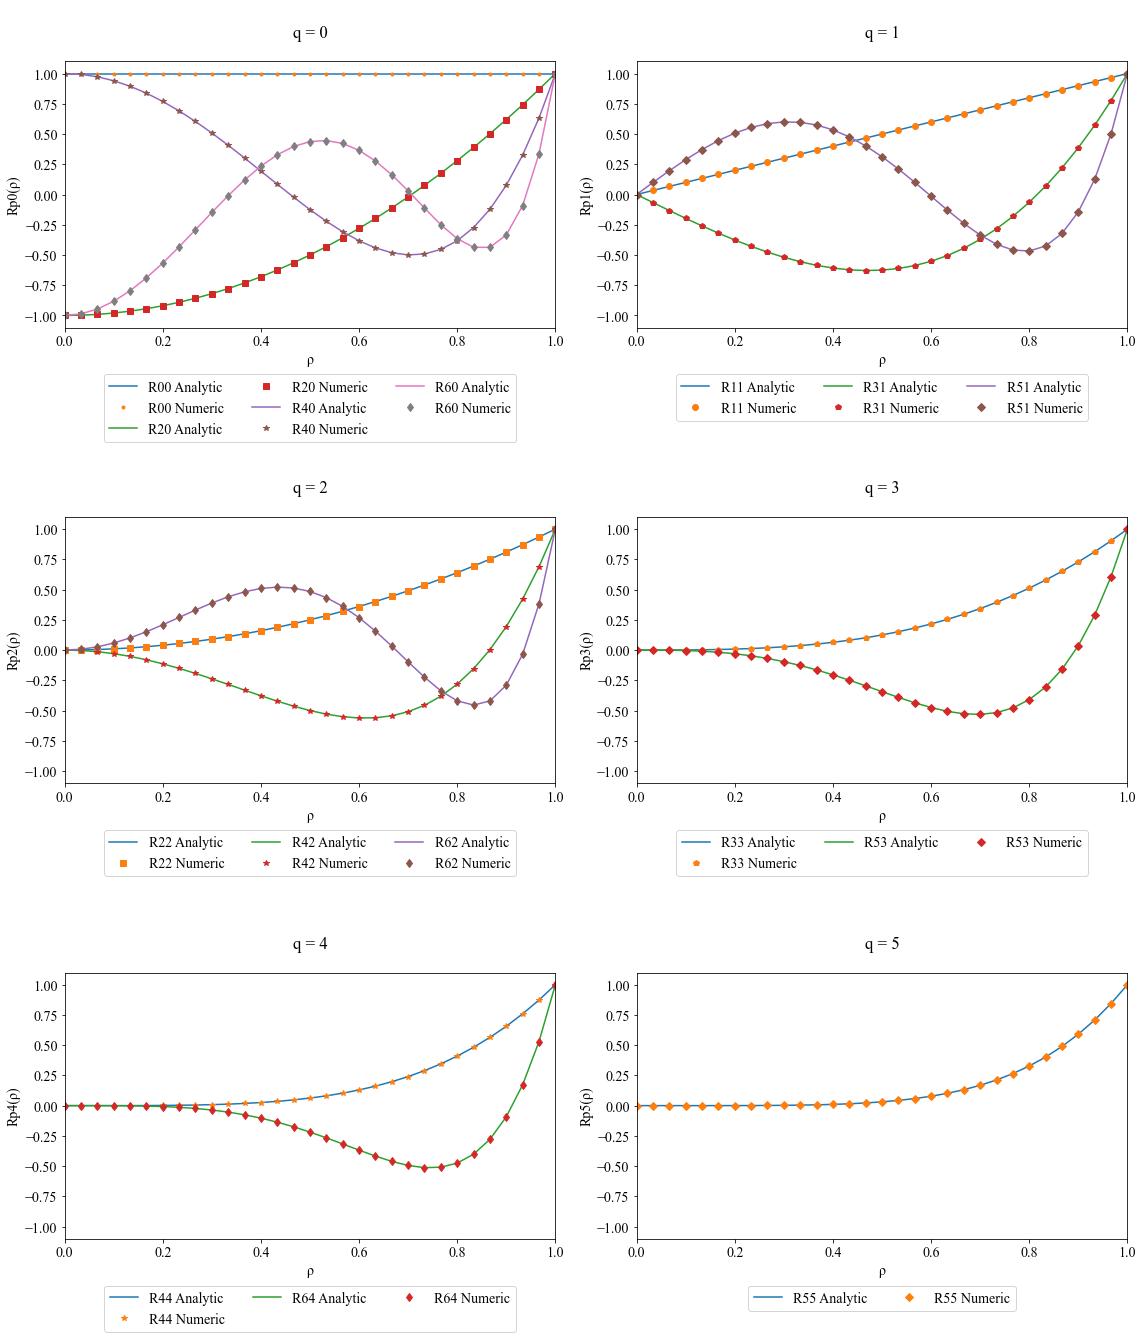

Done.
Wall time: 2.94 s


In [ ]:
%%time
from IPython.display import clear_output
clear_output()

from AZernike import *

print( "Plots of Radial Poolynomial" )
print_curr_time()

debug = 0

datas = []

datas.append( { "order" : (0, 0), "coeffs" : [1] })
datas.append( { "order" : (1, 1), "coeffs" : [1] })
datas.append( { "order" : (2, 0), "coeffs" : [2, -1] })
datas.append( { "order" : (2, 2), "coeffs" : [1] })

datas.append( { "order" : (3, 1), "coeffs" : [3, -2] })
datas.append( { "order" : (3, 3), "coeffs" : [1] })

datas.append( { "order" : (4, 0), "coeffs" : [6, -6, 1] })
datas.append( { "order" : (4, 2), "coeffs" : [4, -3] })
datas.append( { "order" : (4, 4), "coeffs" : [1] })

datas.append( { "order" : (5, 1), "coeffs" : [10, -12, 3] })
datas.append( { "order" : (5, 3), "coeffs" : [5, -4] })
datas.append( { "order" : (5, 5), "coeffs" : [1] })

datas.append( { "order" : (6, 0), "coeffs" : [20, -30, 12, -1] })
datas.append( { "order" : (6, 2), "coeffs" : [15, -20, 6] })
datas.append( { "order" : (6, 4), "coeffs" : [6, -5] })
#datas.append( { "order" : (6, 6), "coeffs" : [1] })

#plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "14"
row_cnt = 3; col_cnt = 2
fig, charts = plt.subplots( row_cnt, col_cnt, figsize=( 8.05*col_cnt, 6.3*row_cnt) )
charts = charts.flatten() if row_cnt*col_cnt > 1 else [ charts ]

use_gpu = 0
print( f"use_gpu = {use_gpu}" )

np = cupy if use_gpu else numpy

step = 1/30
rho = np.arange( 0, 1 + step, step )
rho = rho[ np.where( rho <= 1 ) ]

markers = [ ".", "o", "s", "p", "*", "D", "d" ]

hash = {} 

for data in datas : 
    order  = data[ "order" ]
    coeffs = data[ "coeffs" ]
    
    p = order[0] ; q = order[1]
    
    r_pl_numeric = Rpq( p, q, rho, use_gpu=use_gpu, hash=hash, debug=debug )    
    r_pl_analytic = np.zeros_like( rho )

    for idx, coeff in enumerate( coeffs ) : 
        r_pl_analytic += coeff*np.power( rho, p - 2*idx )
    pass 

    chart = charts[q]
    chart.plot( cupy.asnumpy( rho ), cupy.asnumpy( r_pl_analytic ), linestyle="solid", label=f"R{p}{q} Analytic" )
    chart.plot( cupy.asnumpy( rho ), cupy.asnumpy( r_pl_numeric ), markers[p], label=f"R{p}{q} Numeric" )
    chart.set_xlim(  0, 1 )
    chart.set_ylim( -1.1, 1.1 )
    chart.set_xlabel( "ρ" )
    chart.set_ylabel( f"Rp{q}(ρ)" )
    chart.set_title( f"\nq = {q}\n" )
    chart.legend()
    chart.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)
pass

plt.tight_layout();
plt.savefig( f"./result/zernike_01_radial_function.png" )
plt.show()
#print( f"rho = {rho}" )

print( "Done.")

Current Time = 08:52:52
Zernike Radial polynomail orthogonality validation
use_gpu = 0, use_hash = 1


Resolution:   0%|          | 0/5 [00:00<?, ?it/s]


************************************************************
Radial Grid Count = 1_024, T = 40
Elapsed time = 0.3659020000000055
Error average = 0.0278175820
Memories used = 16_368 bytes

************************************************************
Radial Grid Count = 2_048, T = 40
Elapsed time = 0.4973214999999982
Error average = 0.0132353277
Memories used = 32_752 bytes

************************************************************
Radial Grid Count = 4_096, T = 40
Elapsed time = 0.7866563000000042
Error average = 0.0064452072
Memories used = 65_520 bytes

************************************************************
Radial Grid Count = 8_192, T = 40
Elapsed time = 1.4214514999999892
Error average = 0.0031752330
Memories used = 131_056 bytes

************************************************************
Radial Grid Count = 16_384, T = 40
Elapsed time = 2.7742590999999948
Error average = 0.0015830601
Memories used = 262_128 bytes

Plotting .... 


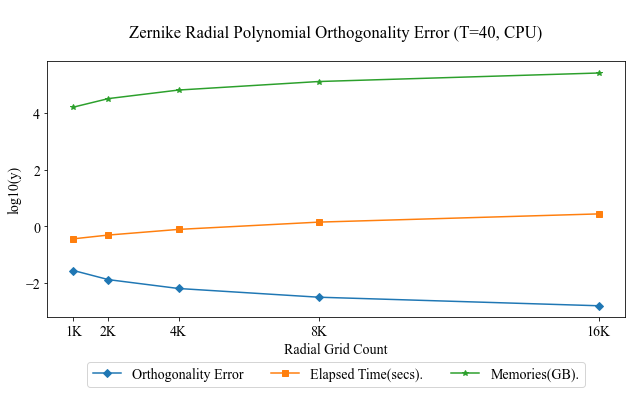

Current Time = 08:52:58
Wall time: 6.05 s


In [ ]:
%%time
from IPython.display import clear_output
clear_output()

from AZernike import *

def validte_radial_polynomial( T, use_gpu, use_hash = 0, debug=0) : 
    print_curr_time()

    print( "Zernike Radial polynomail orthogonality validation" ) 
    print( f"use_gpu = {use_gpu}, use_hash = {use_hash}" )

    numpy.set_printoptions(suppress=1)

    error_avgs = []
    elapsed_list = []

    resolutions = [ 2**x for x in range( 10, 14 + 1 ) ]
    memories = []
    
    np = cupy if use_gpu else numpy
    
    for grid_count in tqdm( resolutions, desc="Resolution" ):
        then = perf_counter() 

        dr = 1.0/grid_count

        rho = np.linspace( 0, 1 + dr, grid_count )
        rho = rho[ np.where( rho <= 1 ) ]

        # debug and print( f"rho = {rho}" )

        good_cnt = 0 
        fail_cnt = 0 

        error_sum = 0
        mem_max = 0 

        hash= {}

        for p in range( 0, T + 1 ) :
            for q in range( 0, T + 1 ) :
                for l in range( -q, q + 1 ) :
                    if abs(l) > p or abs(l) > q:
                        continue ;
                    elif ( p - abs(l) )%2 == 1 :
                        continue
                    elif ( q - abs(l) )%2 == 1 :
                        continue
                    pass

                    r_pl = Rpq( p, l, rho, use_gpu=use_gpu, hash=hash, use_hash=use_hash, debug=0 )
                    r_ql = Rpq( q, l, rho, use_gpu=use_gpu, hash=hash, use_hash=use_hash, debug=0 )
                    
                    mem = (r_pl.nbytes + r_ql.nbytes)
                    
                    if mem > mem_max :
                        mem_max = mem

                    sum = 0 
                    sum = np.sum(r_pl*r_ql*rho*dr)*2*(p + 1)

                    expect = [0, 1][ p == q ]
                    error = abs(expect -sum)
                    error_sum += error
                    success = error < 1/1_000 
                    success_t = 'Good' if success else 'Fail'

                    good_cnt += success
                    fail_cnt += (not success)

                    #debug and print( f"[{p:02d}][{q:02d}] {success_t} : Rpl({p}, {l:2d})*Rql({q}, {l:2d}) = {sum}, exptect = {expect}", flush="True" )
                pass
            pass
        pass

        del hash

        error_avg = error_sum/(good_cnt + fail_cnt)
        error_avgs.append( error_avg )
        memories.append( mem_max )

        elapsed = perf_counter() - then
        elapsed_list.append( elapsed )

        if debug : 
            print( line2 )
            print( f"Radial Grid Count = {grid_count:_}, T = {T}" )
            print( f"Elapsed time = { elapsed }" )
            print( f"Error average = {error_avg:.10f}" )
            #print( f"Fail count = {fail_cnt}, Good count = {good_cnt}", flush="True" )
            print( f"Memories used = {mem_max:_} bytes" )
        pass
    pass

    print( "\nPlotting .... ", flush="True" )

    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams["font.size"] = "14"

    row_cnt = 1; col_cnt = 1
    fig, charts = plt.subplots( row_cnt, col_cnt, figsize=( 9*col_cnt, 6*row_cnt) )
    charts = charts.flatten() if row_cnt*col_cnt > 1 else [charts]
    chart_idx = 0 
    chart = charts[ chart_idx ]

    resolutions = np.array( resolutions )
    error_avgs = np.log10( np.array( error_avgs ) ) 
    elapsed_list = np.log10( np.array( elapsed_list ) )
    memories = np.log10( np.array( memories ) )

    if use_gpu :
        resolutions = cupy.asnumpy( resolutions )
        error_avgs = cupy.asnumpy( error_avgs )
        elapsed_list = cupy.asnumpy( elapsed_list )
        memories = cupy.asnumpy( memories )
    pass

    chart.plot( resolutions, error_avgs, marker="D", label="Orthogonality Error" )
    chart.plot( resolutions, elapsed_list, marker="s", label="Elapsed Time(secs)." )
    chart.plot( resolutions, memories, marker="*", label="Memories(GB)." )

    device = "GPU" if use_gpu else "CPU"
    
    chart.set_title( f"\nZernike Radial Polynomial Orthogonality Error (T={T}, {device})\n" )
    chart.set_xlabel( "Radial Grid Count\n\n" )
    chart.set_ylabel( "log10(y)" )
    chart.set_xticks( resolutions )
    chart.set_xticklabels( [ f"{x/1_000:1.0f}K" for x in resolutions ] ) 
    chart.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=3)

    plt.tight_layout();
    plt.savefig( f"./result/zernike_02_radial_orthogonality.png" )
    plt.show()

    print_curr_time()
pass # -- validte_radial_polynomial

T = 40 #6 #10 # 20
use_gpu = 0 
use_hash = 1
validte_radial_polynomial( T, use_gpu=use_gpu, use_hash=use_hash, debug=1 )


Current Time = 07:09:25

Zernike polynomail orthogonality validation
use_gpu = 1, use_hash = 1


K:   0%|          | 0/6 [00:00<?, ?it/s]


************************************************************
K = 1, Resolution = 128, T = 5
Elapsed time = 0.38912319999963074
Error avg. = 0.0024171439

************************************************************
K = 3, Resolution = 384, T = 5
Elapsed time = 0.5933058000000528
Error avg. = 0.0004986535

************************************************************
K = 5, Resolution = 640, T = 5
Elapsed time = 1.2579342999997607
Error avg. = 0.0002855449

************************************************************
K = 7, Resolution = 896, T = 5
Elapsed time = 2.3439431000006152
Error avg. = 0.0001845916

************************************************************
K = 9, Resolution = 1_152, T = 5
Elapsed time = 3.7647735999998986
Error avg. = 0.0001333956

************************************************************
K = 11, Resolution = 1_408, T = 5
Elapsed time = 5.3846135000003414
Error avg. = 0.0001160941
Plotting .... 


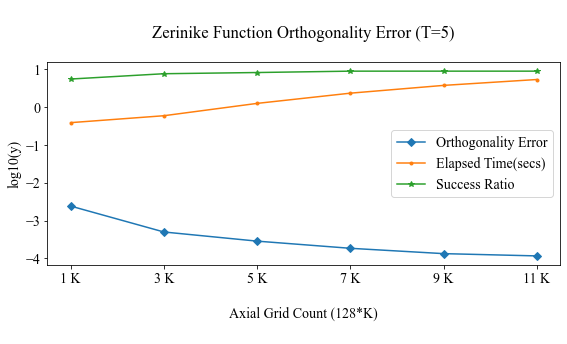

Wall time: 14 s


In [3]:
%%time

from IPython.display import clear_output
clear_output()

# 저니크 함수 테스트 

from AZernike import *

print_curr_time()

print( "\nZernike polynomail orthogonality validation" )

def test_zernike_function_orthogonality( T, use_gpu, use_hash=0, debug = 0 ) : 
    print( f"use_gpu = {use_gpu}, use_hash = {use_hash}" )

    success_ratios = []
    error_avgs = []
    elapsed_list = []

    #resolutions = [ 2**x for x in range( 10, 15 + 1 ) ]
    #resolutions = [ x for x in range( 800, 1_700, 200 ) ]
    #resolutions = [ 2**x for x in range( 8, 11 + 1 ) ]

    Ks = numpy.arange( 1, 11+1, 2 )

    for K in tqdm( Ks, desc="K" ) :
        resolution = 128*K

        if 1 or debug : 
            print( line2 )
            print( f"K = {K}, Resolution = {resolution:_}, T = {T}" )
        pass
        
        then = perf_counter() 

        h = resolution
        w = h 
        img = numpy.ones( (h, w), numpy.uint8 )
        
        if use_gpu :
            img = cupy.asarray( img )
        pass
        
        rho, theta, x, y, dx, dy, k = rho_theta( img, circle_type="inner", use_gpu=use_gpu, debug=debug )
        
        good_cnt = 0 
        fail_cnt = 0 

        error_sum = 0
        
        hash= {}
        
        np = cupy if use_gpu else numpy

        for p1 in range( 0, T + 1 ) :
            for q1 in range( -p1, p1 + 1, 2 ) :
                for p2 in range( 0, T +1 ) :
                    for q2 in range( -p2, p2 + 1, 2 ) : 
                        v_pl = Vpq( p1, q1, rho, theta, use_gpu, hash=hash, use_hash=use_hash, debug=0)
                        v_ql = Vpq( p2, q2, rho, theta, use_gpu, hash=hash, use_hash=use_hash, debug=0)

                        sum_arr = np.sum( np.conjugate(v_pl)*v_ql )
                        sum_integration = sum_arr*dx*dy*(p1 +1)/pi
                        sum = np.absolute( sum_integration )

                        expect = [0, 1][ p1 == p2 and q1 == q2 ]
                        error = abs(expect -sum)
                        error_sum += error
                        success = error < 1/1_000 
                        success_t = 'Good' if success else 'Fail'

                        good_cnt += success
                        fail_cnt += (not success)

                        if not use_hash :
                            del v_pl, v_ql, sum_arr, sum_integration
                        pass

                        debug and print( f"[{p1:02d}][{q1:02d}] {success_t} : V*pl({p1}, {q1:2d})*Vpl({p2}, {q2:2d}) = {sum:.4f}, exptect = {expect}, error={error:.4f}", flush=1 )
                    pass
                pass
            pass
        pass

        del hash

        success_ratio = good_cnt/(good_cnt + fail_cnt)
        success_ratios.append( success_ratio )
        error_avg = error_sum/(good_cnt + fail_cnt)
        error_avgs.append( error_avg )
        
        elapsed = perf_counter() - then
        elapsed_list.append( elapsed )

        if 1 or debug : 
            print( f"Elapsed time = { elapsed }" )
            print( f"Error avg. = {error_avg:.10f}" )
            #print( f"Success = {success_ratio*100:.2f}%, Fail count = {fail_cnt}, Good count = {good_cnt}", flush="True" )
        pass
    pass

    print( "Plotting .... ", flush="True" )

    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams["font.size"] = "14"

    row_cnt = 1; col_cnt = 1
    fig, charts = plt.subplots( row_cnt, col_cnt, figsize=( 8.1*col_cnt, 5*row_cnt) )
    charts = charts.flatten() if row_cnt*col_cnt > 1 else [charts]
    chart_idx = 0 
    chart = charts[ chart_idx ]

    Ks = np.array( Ks )
    error_avgs = np.log10( np.array( error_avgs ) )
    success_ratios = np.array( success_ratios )
    elapsed_list = np.array( elapsed_list )
    elapsed_list = np.log10( elapsed_list )

    if use_gpu :
        Ks = cupy.asnumpy( Ks )
        error_avgs = cupy.asnumpy( error_avgs )
        elapsed_list = cupy.asnumpy( elapsed_list )
        success_ratios = cupy.asnumpy( success_ratios )
    pass

    chart.plot( Ks, error_avgs, marker="D", label="Orthogonality Error" )
    chart.plot( Ks, elapsed_list, marker=".", label="Elapsed Time(secs)" )
    chart.plot( Ks, success_ratios, marker="*", label="Success Ratio" )

    chart.set_title( f"\nZerinike Function Orthogonality Error (T={T})\n" )
    chart.set_xlabel( "\nAxial Grid Count (128*K)\n" )
    chart.set_ylabel( "log10(y)" )
    chart.set_xticks( Ks ) 
    chart.set_xticklabels( [ f"{x} K" for x in Ks ] ) 
    chart.legend()

    plt.tight_layout();
    plt.savefig( f"./result/zernike_03_function_orthogonality.png" )
    plt.show()
pass # test_zernike_function_orthogonality

T = 5 #20 #4 #5 #10 # 20 

use_gpu = 1
use_hash = 1
test_zernike_function_orthogonality(T, use_gpu=use_gpu, use_hash=use_hash, debug=0)
